![Título de la imagen](https://images8.alphacoders.com/800/800013.jpg)


# Precios Sobre Ruedas  🚘

Un concesionario de autos usados en Australia está buscando una estrategia de precios más precisa para aumentar sus ventas y mejorar la rentabilidad. Actualmente, los precios se fijan de manera subjetiva, basándose en la experiencia de los vendedores y en tendencias generales del mercado. Sin embargo, esto ha generado inconsistencias en la tasación de los vehículos y oportunidades de negocio.

Para mejorar la precisión de los precios y aumentar la competitividad, la empresa quiere desarrollar un modelo de Machine Learning que prediga el precio óptimo de un auto en función de sus características.

## Definición del Problema

### Objetivo:
Desarrollar un modelo de Machine Learning que prediga el precio óptimo de un vehículo usado en función de sus características específicas, con el propósito de:
- Mejorar la precisión en la tasación de precios.
- Aumentar la competitividad del concesionario.
- Maximizar las ventas y la rentabilidad.

### Tipo de Problema:
Este es un problema de **Regresión**, ya que el objetivo es predecir una variable numérica continua (precio).

### Métricas Principales:
Las métricas que se utilizarán para evaluar el desempeño del modelo son:
- **MAE (Mean Absolute Error):** Mide el error promedio entre los valores predichos y los reales.
- **RMSE (Root Mean Square Error):** Calcula la raíz cuadrada del error cuadrático medio, penalizando más los errores grandes.
- **R² (Coeficiente de Determinación):** Evalúa qué tan bien se ajusta el modelo a los datos reales.


## Análisis Exploratio de Datos 

### Liberias

In [1]:
# Sistema
import warnings
warnings.filterwarnings("ignore")

# Datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, MinMaxScaler

# Clustering y Reducción de Dimensionalidad
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Division de datos y optimización de Modelos
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Guardar Modelo
import joblib


# Configurar Pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

### Carga de datos - EDA

In [2]:
df = pd.read_csv('../data/raw/Australian Vehicle Prices.csv')
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


### Exploración inicial de datos

In [3]:
Exploration = pd.DataFrame({'Valores nulos': df.isnull().sum(), 'Porcentaje (%)': (df.isnull().sum() / df.shape[0]) * 100, 'Tipo de dato': df.dtypes}).reset_index().rename(columns={'index': 'Columna'}).query('`Valores nulos` > 0').assign(Total_columnas=df.shape[1])
Exploration

,Columna,Valores nulos,Porcentaje (%),Tipo de dato,Total_columnas
0,Brand,1,0.005976,object,19
1,Year,1,0.005976,float64,19
2,Model,1,0.005976,object,19
3,Car/Suv,28,0.167324,object,19
4,Title,1,0.005976,object,19
5,UsedOrNew,1,0.005976,object,19
6,Transmission,1,0.005976,object,19
7,Engine,1,0.005976,object,19
8,DriveType,1,0.005976,object,19
9,FuelType,1,0.005976,object,19


### Información General
- El DataFrame tiene 19 columnas con distintos tipos de datos (principalmente `object` y algunos `float64`).

### Valores Nulos
- Algunas columnas tienen un porcentaje muy bajo de valores nulos (aproximadamente 0.006%).
- Las columnas con **más valores nulos** son:
  - `Location` (2.69%)
  - `BodyType` (1.69%)
  - `Doors` (9.59%)
  - `Seats` (10.19%)

### Columnas Destacadas
- `Price` y varias otras columnas tienen pocos valores nulos (entre 0 y 3 nulos).
- Las columnas de características físicas (`Doors`, `Seats`) presentan mayor proporción de datos faltantes, posiblemente relevantes para revisiones o imputaciones.


## Limpieza y Transformación de datos 💻

In [4]:
class DataLimpieza:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    def clean_data(self):
        self.clean_engine()
        self.clean_fuel_consumption()
        self.clean_location()
        self.clean_colour_ext_int()
        self.clean_doors_and_seats()
        self.clean_year()
        self.drop_unnecessary_columns()
        self.convert_data_types()
        self.filter_and_impute()
        self.remove_invalid_categories()
        self.handle_missing_values()
        self.reorder_columns()
        return self.df

    def clean_engine(self):
        self.df['Engine'] = self.df['Engine'].replace('-', pd.NA)
        self.df[['Cylinders', 'EngineLiters']] = self.df['Engine'].str.extract(r'(\d+)\s*cyl,\s*([\d\.]+)\s*L')
        self.df['Cylinders'] = self.df['Cylinders'].astype(float)
        self.df['EngineLiters'] = self.df['EngineLiters'].astype(float)
        self.df.drop(columns=['Engine', 'CylindersinEngine'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_fuel_consumption(self):
        self.df['Fuel100KM'] = self.df['FuelConsumption'].str.extract(r'(\d+\.\d+)').astype(float)
        self.df.drop(columns=['FuelConsumption'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_location(self):
        self.df[['City', 'State']] = self.df['Location'].str.split(',', n=1, expand=True)
        self.df['City'] = self.df['City'].str.strip()
        self.df['State'] = self.df['State'].str.strip()
        self.df.drop(columns=['Location'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_colour_ext_int(self):
        self.df['Color'] = self.df['ColourExtInt'].str.split('/', n=1, expand=True)[0].str.strip()
        self.df.dropna(subset=['Color'], inplace=True)
        self.df.drop(columns=['ColourExtInt'], inplace=True, errors='ignore')
        self.df.dropna(inplace=True)

    def clean_doors_and_seats(self):
        self.df['Doors'] = self.df['Doors'].str.extract(r'(\d+)')
        self.df['Seats'] = self.df['Seats'].str.extract(r'(\d+)')
        self.df.dropna(inplace=True)

    def clean_year(self):
        self.df['Year'] = self.df['Year'].astype(int)
        self.df.dropna(inplace=True)

    def drop_unnecessary_columns(self):
        self.df.drop(columns=['Car/Suv'], inplace=True, errors='ignore')

    def convert_data_types(self):
        self.df['Price'] = pd.to_numeric(self.df['Price'], errors='coerce')
        self.df['Kilometres'] = pd.to_numeric(self.df['Kilometres'], errors='coerce')
        self.df.dropna(inplace=True)

    def filter_and_impute(self):
        self.df = self.df[self.df['Year'] > 2000]
        self.df['Kilometres'].fillna(self.df['Kilometres'].median(), inplace=True)
        self.df.dropna(subset=['Price'], inplace=True)
    
    def remove_invalid_categories(self):
        categorical_columns = ['FuelType', 'Transmission', 'DriveType']
        self.df.replace('-', pd.NA, inplace=True)
        self.df.dropna(subset=categorical_columns, inplace=True)
    
    def handle_missing_values(self):
        self.df['Seats'].fillna(self.df['Seats'].mode()[0], inplace=True)
        self.df['Doors'].fillna(self.df['Doors'].mode()[0], inplace=True)
        self.df['Fuel100KM'].fillna(self.df['Fuel100KM'].median(), inplace=True)
    
    def reorder_columns(self):
        self.df = self.df[['Brand', 'Model', 'Year', 'Title', 'BodyType', 'Doors', 'Seats', 
                           'Kilometres', 'FuelType', 'Transmission', 'DriveType', 'Cylinders', 
                           'EngineLiters', 'Fuel100KM', 'UsedOrNew', 'Color', 'City', 'State', 'Price']]

file_path = '../data/raw/Australian Vehicle Prices.csv'
cleaner = DataLimpieza(file_path)
df = cleaner.clean_data()
df.to_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_limpio.csv', index=False)


### Explicación del Código de Limpieza de Datos

La clase **DataLimpieza** está diseñada para simplificar y automatizar el preprocesamiento de datos en el análisis de precios de vehículos. Su propósito principal es transformar un conjunto de datos crudos en una versión organizada y preparada para el modelado predictivo. Este proceso abarca la detección y corrección de inconsistencias, la eliminación de valores erróneos y la estructuración eficiente de la información para su análisis.

La limpieza de datos se lleva a cabo siguiendo un flujo bien definido, donde cada etapa aplica transformaciones específicas para garantizar la calidad y la coherencia de los datos, optimizando así los resultados en posteriores fases analíticas y predictivas.


### Flujo de Trabajo de la Clase

### 1. Carga de Datos
- La clase toma como entrada un archivo CSV y lo convierte en un DataFrame para su manipulación.

### 2. Limpieza de Datos
- Se eliminan valores vacíos o incorrectos en varias columnas.
- Se extraen valores relevantes de campos con formatos complejos, como el número de cilindros y la capacidad del motor.
- Se separan datos combinados en múltiples variables, como localización (City y State) y colores del auto (Color).
- Se eliminan valores "-" en variables categóricas (FuelType, Transmission, DriveType) para evitar inconsistencias en el modelado.

### 3. Conversión de Tipos de Datos
- Se convierten valores de texto a formatos numéricos cuando es necesario.
- Se transforman valores categóricos a formatos más manejables.

### 4. Filtrado y Corrección de Datos
- Se establecen reglas para filtrar autos irrelevantes, como aquellos fabricados antes del año 2000.
- Se imputan valores nulos en columnas clave:
  - **Kilometraje (Kilometres):** Mediana para evitar sesgos.
  - **Consumo de combustible (Fuel100KM):** Mediana para completar valores faltantes.
  - **Número de puertas (Doors) y asientos (Seats):** Moda (valor más frecuente).
- Se mantiene la estructura original del dataset sin eliminar outliers para aprovechar la mayor cantidad de datos posible.

### 5. Reorganización de la Información
- Se eliminan columnas que no aportan valor al análisis.
- Se reordenan las columnas para facilitar la interpretación y el análisis posterior.

### 6. Exportación de los Datos Limpios
- El DataFrame resultante se guarda en un nuevo archivo CSV con los datos procesados y listos para ser utilizados en la fase de modelado de Machine Learning.

## Gráficos Iniciales

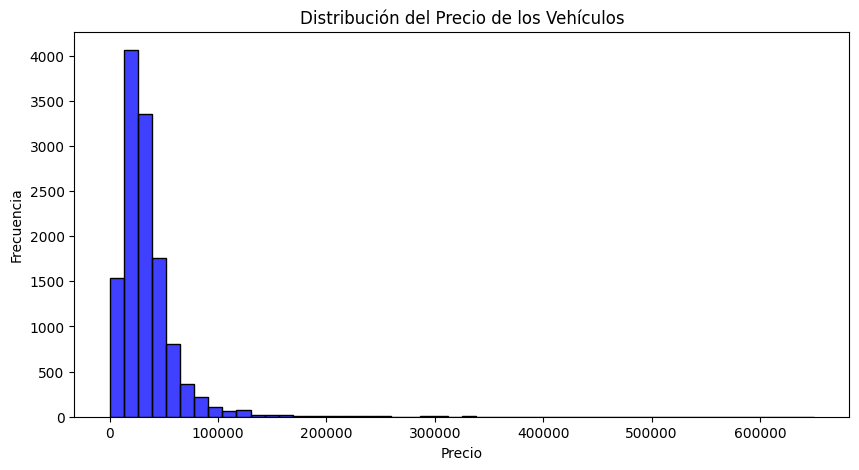

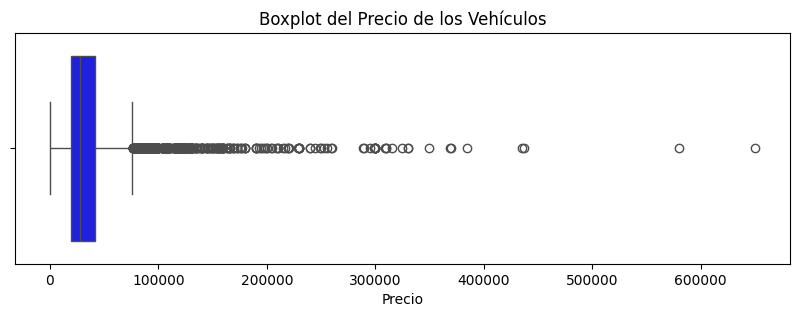

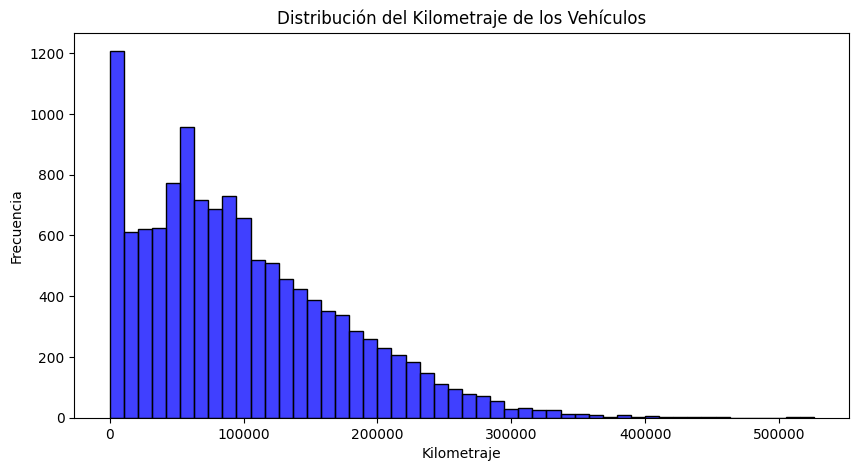

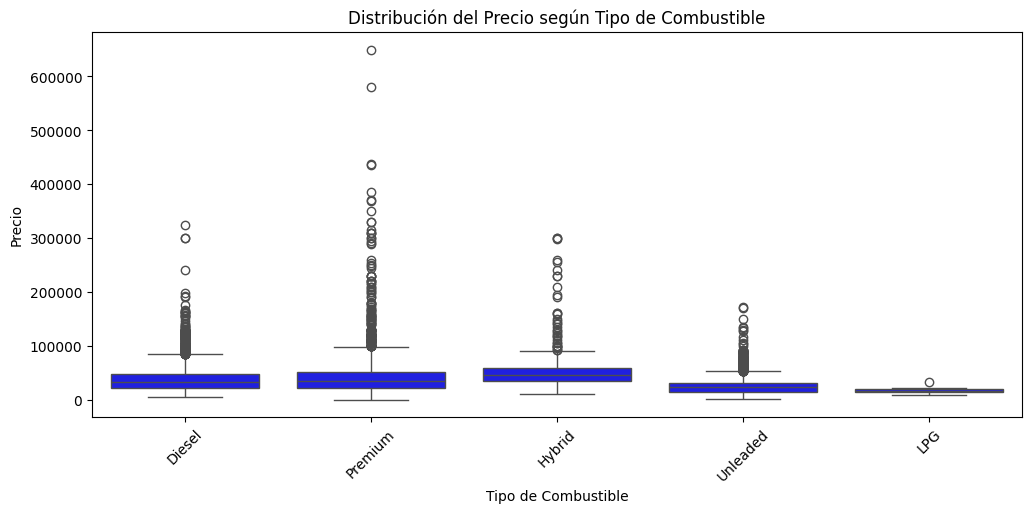

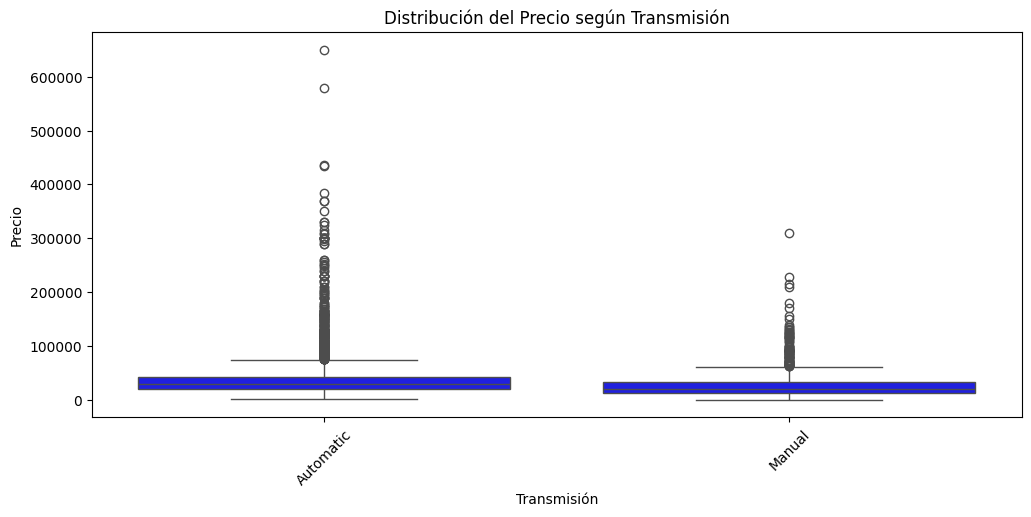

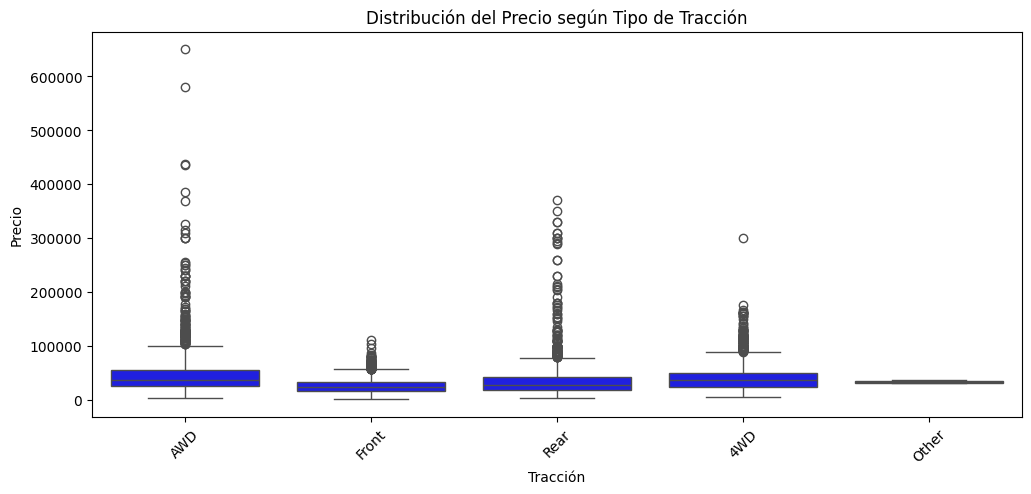

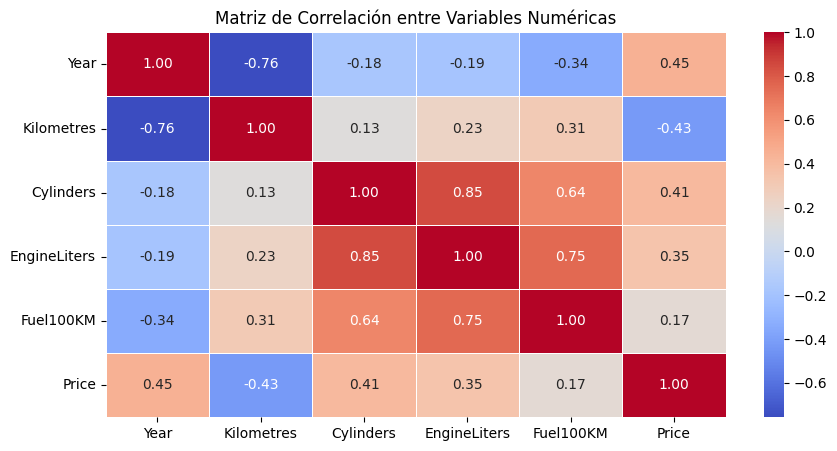

In [5]:
df = pd.read_csv('../data/processed/df_limpio.csv')
figures = [
    {"func": sns.histplot, "x": 'Price', "kwargs": {"bins": 50, "kde": False, "color": 'blue'}, "xlabel": "Precio", "ylabel": "Frecuencia", "title": "Distribución del Precio de los Vehículos", "figsize": (10, 5)},
    {"func": sns.boxplot, "x": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Precio", "ylabel": None, "title": "Boxplot del Precio de los Vehículos", "figsize": (10, 3)},
    {"func": sns.histplot, "x": 'Kilometres', "kwargs": {"bins": 50, "kde": False, "color": 'blue'}, "xlabel": "Kilometraje", "ylabel": "Frecuencia", "title": "Distribución del Kilometraje de los Vehículos", "figsize": (10, 5)},
    {"func": sns.boxplot, "x": 'FuelType', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Tipo de Combustible", "ylabel": "Precio", "title": "Distribución del Precio según Tipo de Combustible", "figsize": (12, 5), "xticks_rotation": 45},
    {"func": sns.boxplot, "x": 'Transmission', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Transmisión", "ylabel": "Precio", "title": "Distribución del Precio según Transmisión", "figsize": (12, 5), "xticks_rotation": 45},
    {"func": sns.boxplot, "x": 'DriveType', "y": 'Price', "kwargs": {"color": 'blue'}, "xlabel": "Tracción", "ylabel": "Precio", "title": "Distribución del Precio según Tipo de Tracción", "figsize": (12, 5), "xticks_rotation": 45}
]

for fig in figures:
    plt.figure(figsize=fig["figsize"])
    plot = fig["func"](x=df[fig["x"]], **fig["kwargs"]) if "y" not in fig else fig["func"](x=df[fig["x"]], y=df[fig["y"]], **fig["kwargs"])
    plt.xlabel(fig["xlabel"])
    if fig["ylabel"]:
        plt.ylabel(fig["ylabel"])
    plt.title(fig["title"])
    if "xticks_rotation" in fig:
        plt.xticks(rotation=fig["xticks_rotation"])
    plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[['Year', 'Kilometres', 'Cylinders', 'EngineLiters', 'Fuel100KM', 'Price']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Distribución del Precio de los Vehículos
- La distribución está sesgada a la derecha.
- **Interpretación**: La mayoría de los vehículos tienen precios bajos o moderados, pero hay algunos valores extremadamente altos.

### Boxplot del Precio de los Vehículos
- Se identificaron **outliers significativos** en los precios.

### Distribución del Kilometraje de los Vehículos
- El kilometraje muestra una distribución sesgada.
- **Interpretación**: Algunos vehículos tienen valores de kilometraje extremadamente altos.

### Distribución del Precio según Tipo de Combustible
- **Observación**: Los vehículos con combustible "Premium" o "Híbridos" tienden a tener precios más altos en comparación con otros.

### Distribución del Precio según Transmisión
- **Observación**: Los vehículos con transmisión automática tienen precios más altos que los manuales.
- También existen valores atípicos en ambas categorías.

### Distribución del Precio según Tipo de Tracción
- Los vehículos AWD (tracción total) suelen ser **más costosos** que aquellos con tracción simple.

### Matriz de Correlación entre Variables Numéricas
- **Year**: Correlación positiva con `Price`, indicando que los autos más nuevos tienden a ser más caros.
- **Kilometres**: Correlación negativa con `Price`, mostrando que los autos con mayor kilometraje suelen tener un precio menor.
- **Cylinders** y **EngineLiters**: Correlación positiva con `Price`, lo que sugiere que autos con motores más grandes son más caros.
- **Fuel100KM**: Baja correlación con `Price`, indicando que el consumo de combustible no es un factor clave.


### Guardamos Df limpio para otros modelos

In [6]:
df.to_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_procesado.csv',index=False)

## Transformación Logarítmica 

In [7]:
df["LogPrice"] = np.log1p(df["Price"])

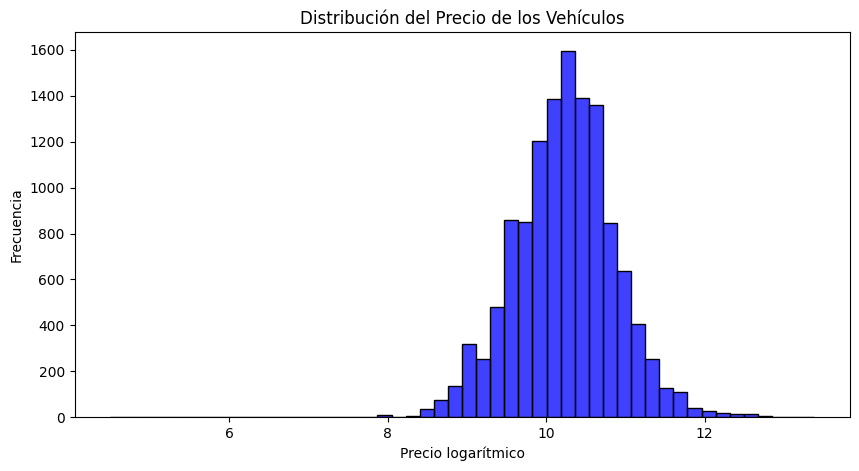

In [8]:
df
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='LogPrice', bins=50, kde=False, color='blue')
plt.xlabel("Precio logarítmico")
plt.ylabel("Frecuencia")
plt.title("Distribución del Precio de los Vehículos")
plt.show()

## Normalización de los datos

In [9]:
df['antigüedad'] = 2024 - df['Year']
df.drop(columns='Year', inplace=True)

columnas_excluir = ['Price', 'LogPrice', 'antigüedad']
X_num = df.drop(columns=columnas_excluir).select_dtypes(include='number')

columnas_error = []
for col in X_num.columns:
    try:
        PowerTransformer(method='yeo-johnson').fit_transform(X_num[[col]])
    except:
        columnas_error.append(col)

columnas_validas = [col for col in X_num.columns if col not in columnas_error]
pt = PowerTransformer(method='yeo-johnson')
X_transformado = pt.fit_transform(X_num[columnas_validas])

df[columnas_validas] = X_transformado

print("Columnas normalizadas:", columnas_validas)
print("Columnas excluidas (se quedan sin transformar):", columnas_error + ['antigüedad'])

Columnas normalizadas: ['Doors', 'Seats', 'Kilometres', 'Cylinders', 'EngineLiters', 'Fuel100KM']
Columnas excluidas (se quedan sin transformar): ['antigüedad']


### Resumen del Código de Normalización

1. **Cálculo de la variable antigüedad**
   
   Se calcula la antigüedad del vehículo mediante la fórmula:  
   `Antigüedad = 2024 - Year`.

   Posteriormente, se elimina la columna original "Year" del conjunto de datos.

2. **Selección de columnas para normalización**

   Se excluyen las columnas "Price", "log_precio" y "antigüedad" de la normalización.  
   Se mantienen solo las variables numéricas restantes para el proceso de normalización.

3. **Identificación de columnas problemáticas**

   Se aplica el `PowerTransformer` a cada columna de forma individual.  
   En caso de que alguna columna presente problemas durante la transformación, se añade a una lista de columnas con errores (`columnas_error`).

4. **Aplicación de PowerTransformer**

   El `PowerTransformer` se aplica exclusivamente a aquellas columnas que no presentaron problemas en el paso anterior.  
   Las columnas originales se reemplazan por las versiones transformadas en el DataFrame.

5. **Resultados finales**

   Finalmente, se imprimen las listas de columnas que han sido normalizadas y aquellas que han sido excluidas o que presentaron problemas durante el proceso.


### Graficos de confirmación

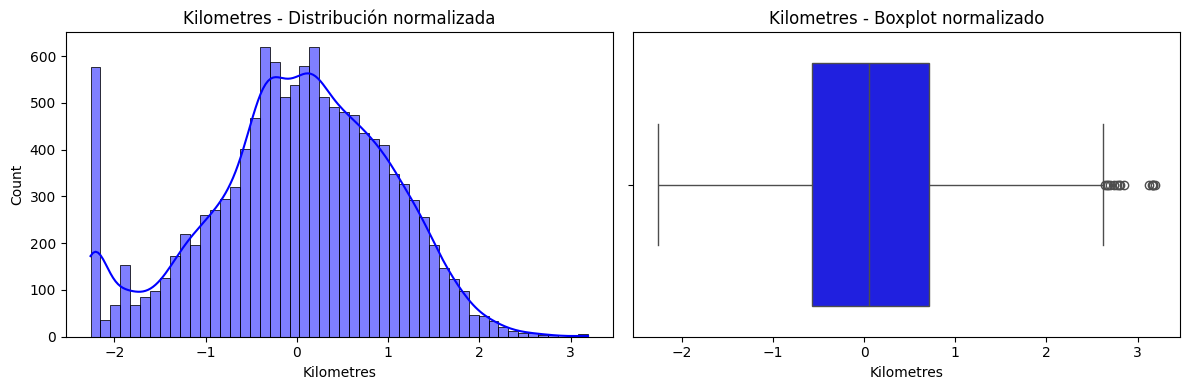

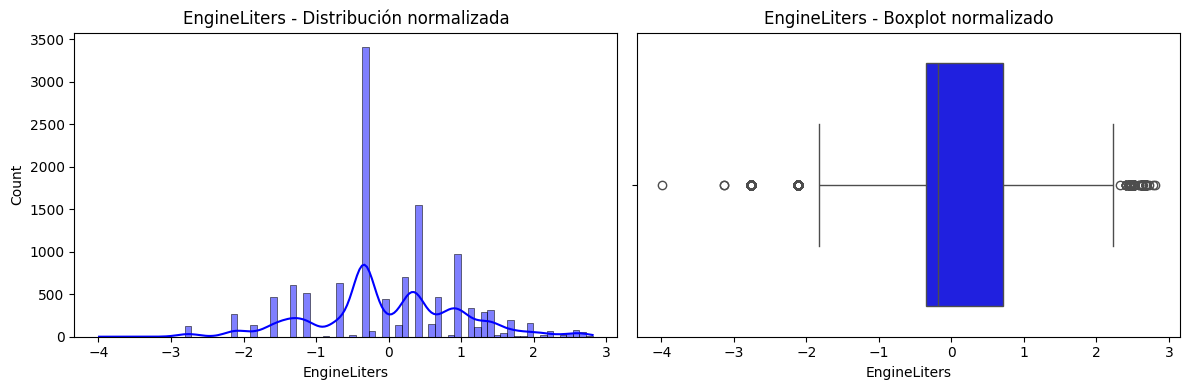

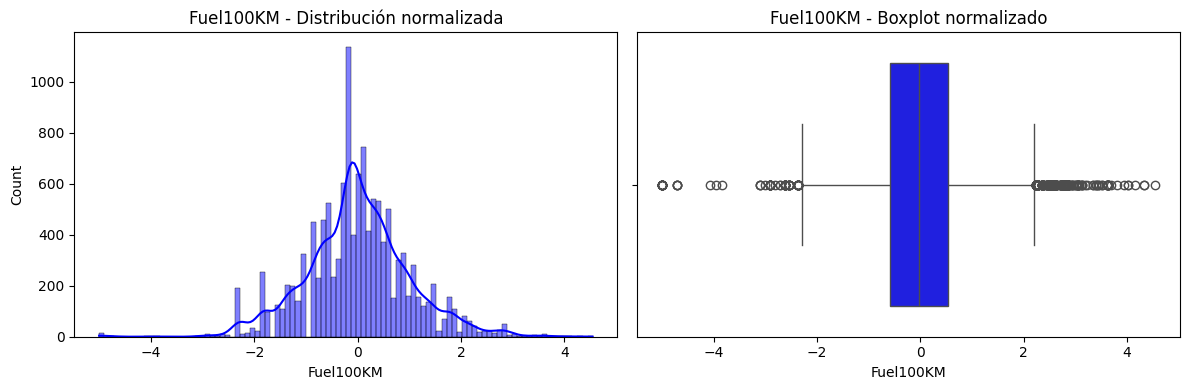

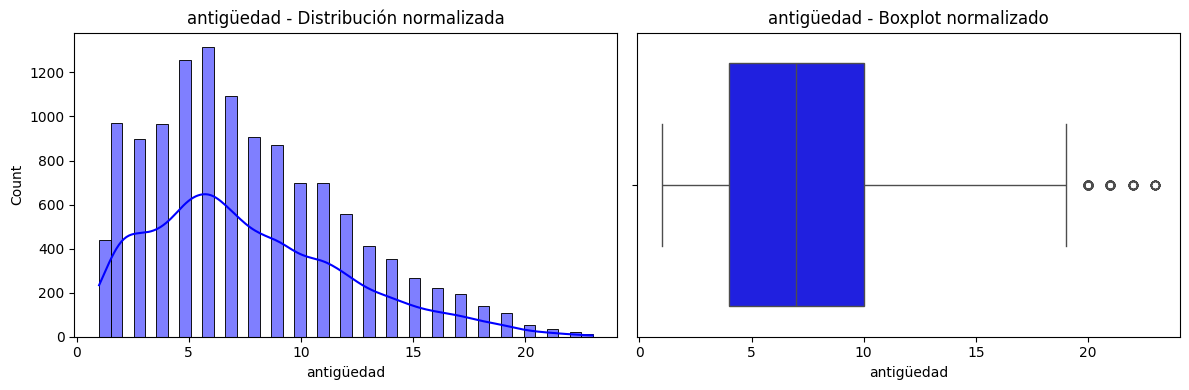

In [10]:
variables = ['Kilometres', 'EngineLiters', 'Fuel100KM', 'antigüedad']

for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[var], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"{var} - Distribución normalizada")

    sns.boxplot(x=df[var], ax=axes[1], color='blue')
    axes[1].set_title(f"{var} - Boxplot normalizado")

    plt.tight_layout()
    plt.show()

### Kilometres
**Significado**: Representa la cantidad de kilómetros recorridos por el vehículo.

**Resultados del histograma**: La mayoría de los vehículos tienen pocos kilómetros recorridos; algunos casos presentan alto kilometraje. La normalización comprimió la escala, aunque persisten valores extremos.

**Resultados del boxplot**: La distribución está compactada, pero hay outliers en la parte superior. Se puede considerar aplicar RobustScaler si estos valores afectan el modelo.

### EngineLiters
**Significado**: Tamaño del motor en litros.

**Resultados del histograma**: Los valores están concentrados en puntos específicos, sugiriendo que la variable puede ser más categórica que continua. La transformación no logró una distribución completamente normal debido a tamaños estándar de motores (ej. 1.6L, 2.0L, 3.0L).

**Resultados del boxplot**: Existen varios outliers que podrían representar valores fuera de rango. Es recomendable verificar si son válidos o errores.

### Fuel100KM
**Significado**: Consumo de combustible en litros cada 100 km.

**Resultados del histograma**: La normalización mejoró la simetría de la distribución, reduciendo el sesgo. Aún persisten valores concentrados en puntos específicos.

**Resultados del boxplot**: Hay outliers en ambos extremos, posiblemente indicando vehículos eléctricos o deportivos con consumos inusuales.

### Antigüedad
**Significado**: Años desde la fabricación del vehículo hasta la actualidad (2024)

**Resultados del histograma**: La transformación mejoró la distribución, aunque la variable sigue mostrando un patrón escalonado debido a su naturaleza discreta.

**Resultados del boxplot**: No se observan outliers significativos. La variable está bien normalizada y lista para usarse en modelos.


## Codificación de los datos

In [11]:
categorical_one_hot = ["FuelType", "Transmission", "DriveType", "UsedOrNew"]
df = pd.get_dummies(df, columns=categorical_one_hot, drop_first=True)

one_hot_columns = df.filter(like='_').columns
df[one_hot_columns] = df[one_hot_columns].astype(int)

categorical_label = ["Brand", "Model", "BodyType", "Color", "City", "State"]
label_encoders = {}

for col in categorical_label:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


## Clustering con K-Means / PCA

  File "c:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\garci\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


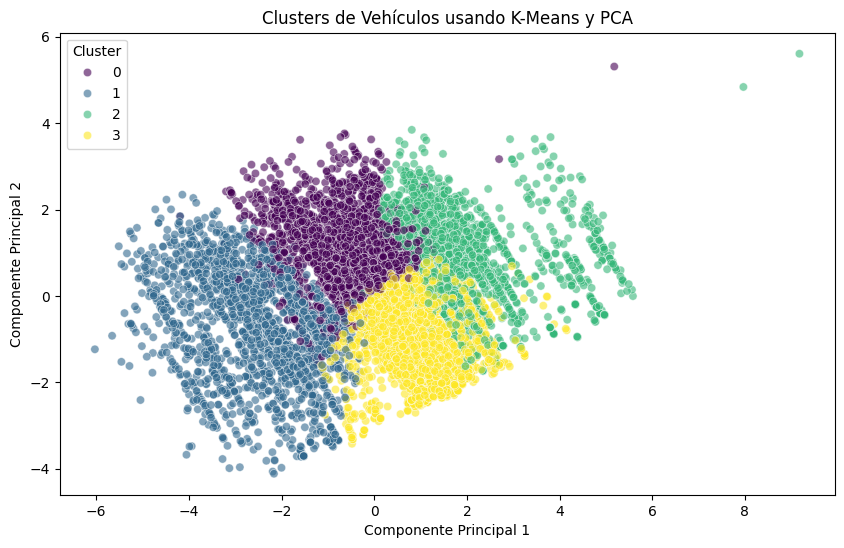

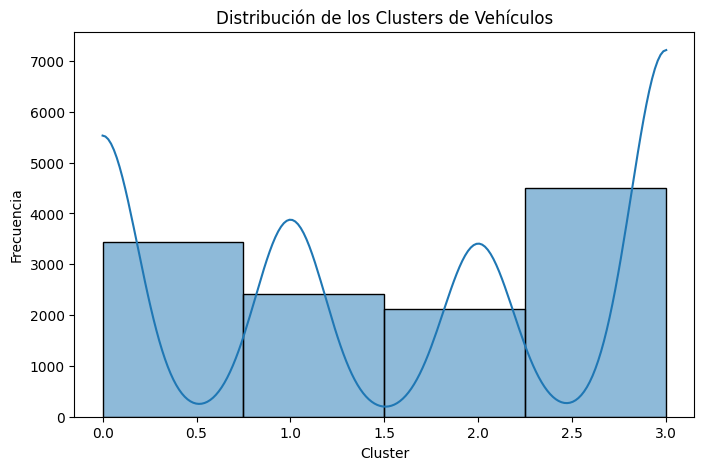

Resumen de cada Cluster:
             Brand       Model  BodyType     Doors     Seats  Kilometres  \
Cluster                                                                    
0        37.881823  299.991580  6.177991 -0.379242 -0.205205    0.839608   
1        30.150373  309.273405  6.506628 -0.439394  0.142666    0.376922   
2        39.880717  268.753890  3.692598  1.672164 -0.103833   -0.286007   
3        35.836821  317.659617  6.165850 -0.262656  0.129688   -0.711237   

         Cylinders  EngineLiters  Fuel100KM      Color        City     State  \
Cluster                                                                        
0        -0.335212     -0.009899   0.175910  12.211963  273.993322  3.177991   
1         1.701329      1.392062   1.117100  11.067523  276.634217  3.425849   
2        -0.709609     -1.007270  -1.060593  11.491278  271.007072  3.278171   
3        -0.322229     -0.264899  -0.234416  11.902271  267.645815  3.532725   

                Price   LogPrice  ant

In [12]:
df = df.dropna().copy()

X_cluster = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Price", "LogPrice"], errors='ignore')

if X_cluster.shape[1] == 0:
    raise ValueError("No hay suficientes columnas numéricas para realizar clustering.")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="viridis", alpha=0.6)
plt.title("Clusters de Vehículos usando K-Means y PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Cluster"], bins=4, kde=True)
plt.title("Distribución de los Clusters de Vehículos")
plt.xlabel("Cluster")
plt.ylabel("Frecuencia")
plt.show()

cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print("Resumen de cada Cluster:")
print(cluster_summary)

In [13]:
df['Año_Fabricacion'] = 2024 - df['antigüedad']
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary[['Año_Fabricacion']])

         Año_Fabricacion
Cluster                 
0            2012.889954
1            2014.595278
2            2017.095710
3            2019.611977


### Resumen de Clusters

| Cluster | Doors  | Seats  | Kilómetros | Cilindros | Litros del motor | Consumo de combustible (L/100km) | Precio promedio AUD | Log del precio | Antigüedad (años) |
|---------|--------|--------|------------|-----------|------------------|----------------------------------|---------------------|-----------------|-------------------|
| 0       | -0.38  | -0.21  | 0.84       | -0.34     | -0.01            | 0.18                             | 20,154 $            | 9.28            | 11.11             |
| 1       | -0.44  | 0.14   | 0.38       | 1.70      | 1.39             | 1.12                             | 48,460 $            | 9.94            | 9.40              |
| 2       | 1.67   | -0.10  | -0.29      | -0.71     | -1.01            | -1.06                            | 27,018 $            | 9.54            | 6.90              |
| 3       | -0.26  | 0.13   | -0.71      | -0.32     | -0.26            | -0.23                            | 40,966 $            | 10.07           | 4.39              |

### Nota

El análisis de los clusters revela las siguientes tendencias:

- **Cluster 0**: Este grupo está compuesto por vehículos con características equilibradas, destacando un precio promedio de 20,154 $ y una antigüedad de aproximadamente 11.1 años. Estos autos presentan un consumo de combustible moderado y un rendimiento adecuado, lo que los convierte en opciones razonables para compradores que buscan una buena relación calidad-precio, aunque con vehículos más antiguos.

- **Cluster 1**: Los autos en este grupo tienen un precio promedio elevado de 48,460 $, y su antigüedad es de aproximadamente 9.4 años. Con un motor más potente y un mayor consumo de combustible, estos vehículos son adecuados para compradores que buscan autos de mayor rendimiento, lujo y exclusividad, a pesar de que su antigüedad aún es relativamente baja.

- **Cluster 2**: Este cluster incluye vehículos con un precio promedio de 27,018 $ y una antigüedad de alrededor de 6.9 años. Estos autos están orientados hacia compradores que buscan opciones económicas con un consumo de combustible eficiente. Aunque su rendimiento no es tan elevado como en otros clusters, son adecuados para quienes priorizan la economía.

- **Cluster 3**: Este grupo está formado por vehículos de características intermedias en cuanto a rendimiento y lujo, con un precio promedio de 40,966 $ y una antigüedad de 4.4 años. Son opciones con un buen equilibrio entre rendimiento y precio, adecuados para compradores que buscan autos relativamente nuevos y de buen rendimiento.

Este análisis facilita la toma de decisiones de compra al ofrecer una visión clara de los diferentes tipos de vehículos disponibles, según el presupuesto, el rendimiento y la antigüedad del vehículo.


### Evalucación del PCA

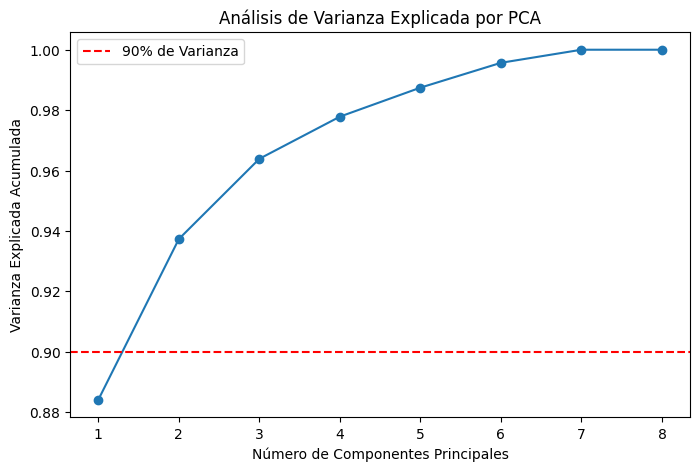

Se necesitan 2 componentes para explicar al menos el 90% de la varianza.


In [14]:
X_pca_eval = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Price", "LogPrice", "Cluster"], errors='ignore')

pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_eval)

varianza_explicada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='-')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Análisis de Varianza Explicada por PCA")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% de Varianza")
plt.legend()
plt.show()

num_componentes_90 = np.argmax(varianza_explicada >= 0.90) + 1
print(f"Se necesitan {num_componentes_90} componentes para explicar al menos el 90% de la varianza.")

### Guardamos data para proceso

In [15]:
df.to_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_para_pca.csv', index=False)
df.to_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_sin_pca.csv', index=False)

## SIN PCA

In [16]:
df = pd.read_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_sin_pca.csv')

### Modelos de Predicción

In [17]:
X = df.drop(columns=["Price","Title", "LogPrice", "Cluster"], errors='ignore')
y = df["LogPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regresión Lineal 

In [18]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - Resultados:")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")

Regresión Lineal - Resultados:
MAE  : 0.2179
RMSE : 0.2889
R²   : 0.7844


### K-Nearest Neighbors

In [19]:
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred_knn = modelo_knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors - Resultados:")
print(f"MAE  : {mae_knn:.4f}")
print(f"RMSE : {rmse_knn:.4f}")
print(f"R²   : {r2_knn:.4f}")

K-Nearest Neighbors - Resultados:
MAE  : 0.3431
RMSE : 0.4708
R²   : 0.4273


### K-Nearest Neighbors - Optimizado

In [20]:
param_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_knn = RandomizedSearchCV(
    KNeighborsRegressor(),
    param_distributions=param_knn,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_knn.fit(X_train, y_train)

best_knn = random_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print("KNN- Optimizado:", random_knn.best_params_)
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

KNN- Optimizado: {'weights': 'uniform', 'p': 1, 'n_neighbors': 4}
MAE : 0.28513089204322356
RMSE: 0.39526970216788665
R²  : 0.596322688866419


### Support Vector Machine

In [21]:
modelo_svm = SVR(kernel='rbf')
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict(X_test)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Machine - Resultados:")
print(f"MAE  : {mae_svm:.4f}")
print(f"RMSE : {rmse_svm:.4f}")
print(f"R²   : {r2_svm:.4f}")

Support Vector Machine - Resultados:
MAE  : 0.4224
RMSE : 0.5507
R²   : 0.2164


### Support Vector Machine - Optimizado

In [22]:
param_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

random_svm = RandomizedSearchCV(
    SVR(),
    param_distributions=param_svm,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_svm.fit(X_train, y_train)

best_svm = random_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_svm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2 = r2_score(y_test, y_pred_svm)

print("SVM - Optimizado:", random_svm.best_params_)
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

SVM - Optimizado: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
MAE : 0.2117814105748047
RMSE: 0.2988838329381987
R²  : 0.7691913209409533


## Con el PCA

In [23]:
df = pd.read_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_para_pca.csv')

In [24]:
X_pca_data = df.drop(columns=["Price","Title", "LogPrice", "Cluster"], errors='ignore')
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_pca_data)
df_pca = pd.DataFrame(X_pca_reduced, columns=["PC1", "PC2"])
df_pca["LogPrice"] = df["LogPrice"].values 

### Modelos de Predicción

In [25]:
X = df_pca.drop(columns=["LogPrice"])
y = df_pca["LogPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión Lineal

In [26]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - Resultados:")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")

Regresión Lineal - Resultados:
MAE  : 0.4756
RMSE : 0.6131
R²   : 0.0287


### K-Nearest Neighbors (KNN)

In [27]:
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred_knn = modelo_knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors - Resultados:")
print(f"MAE  : {mae_knn:.4f}")
print(f"RMSE : {rmse_knn:.4f}")
print(f"R²   : {r2_knn:.4f}")

K-Nearest Neighbors - Resultados:
MAE  : 0.4333
RMSE : 0.5774
R²   : 0.1386


### Support Vector Machine (SVM)

In [28]:
modelo_svm = SVR(kernel='rbf')
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict(X_test)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Machine - Resultados:")
print(f"MAE  : {mae_svm:.4f}")
print(f"RMSE : {rmse_svm:.4f}")
print(f"R²   : {r2_svm:.4f}")

Support Vector Machine - Resultados:
MAE  : 0.4727
RMSE : 0.6095
R²   : 0.0401


## Otros Modelos

In [29]:
df = pd.read_csv(r'C:\Users\garci\Documents\GitHub\Prediction_Autos_ML\data\processed\df_procesado.csv')

### Codificación

In [30]:
categorical_one_hot = ["FuelType", "Transmission", "DriveType", "UsedOrNew"]
df = pd.get_dummies(df, columns=categorical_one_hot, drop_first=True)

one_hot_columns = df.filter(like='_').columns
df[one_hot_columns] = df[one_hot_columns].astype(int)

categorical_label = ["Brand", "Model", "BodyType", "Color", "City", "State"]
label_encoders = {}

for col in categorical_label:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [31]:
df["LogPrice"] = np.log1p(df["Price"])

### Random Forest

In [32]:
X = df.drop(columns=["Price", "Title", "LogPrice"])
y = df["LogPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Resultados:")
print(f"MAE  : {mae_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")

Random Forest - Resultados:
MAE  : 0.1324
RMSE : 0.1866
R²   : 0.9100


### Random Forest - optimizado 

In [34]:
param_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_rf,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest - Optimizado:")
print("Mejores parámetros:", random_search_rf.best_params_)
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Random Forest - Optimizado:
Mejores parámetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
MAE  : 0.1285
RMSE : 0.1841
R²   : 0.9124


### XGBoost

In [35]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Resultados:")
print(f"MAE  : {mae_xgb:.4f}")
print(f"RMSE : {rmse_xgb:.4f}")
print(f"R²   : {r2_xgb:.4f}")


XGBoost - Resultados:
MAE  : 0.1206
RMSE : 0.1710
R²   : 0.9245


### XGBoost - optimizado

In [36]:
param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_xgb,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost - Optimizado:")
print("Mejores parámetros:", random_search_xgb.best_params_)
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


XGBoost - Optimizado:
Mejores parámetros: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
MAE  : 0.1184
RMSE : 0.1661
R²   : 0.9287


## Conclusión Final

### Comparativa de Modelos de Predicción del Precio de Vehículos

| Modelo                    | Tipo    | MAE    | RMSE   | R²     |
|---------------------------|---------|--------|--------|--------|
| XGBoost - Optimizado      | Sin PCA | 0.1184 | 0.1661 | 0.9287 |
| XGBoost                   | Sin PCA | 0.1206 | 0.1710 | 0.9245 |
| Random Forest - Optimizado| Sin PCA | 0.1285 | 0.1841 | 0.9124 |
| Random Forest             | Sin PCA | 0.1324 | 0.1866 | 0.9100 |
| Regresión Lineal          | Sin PCA | 0.2179 | 0.2889 | 0.7844 |
| SVM - Optimizado          | Sin PCA | 0.2118 | 0.2989 | 0.7692 |
| KNN - Optimizado          | Sin PCA | 0.2851 | 0.3953 | 0.5963 |
| KNN                       | Sin PCA | 0.3431 | 0.4708 | 0.4273 |
| SVM                       | Sin PCA | 0.4224 | 0.5507 | 0.2164 |
| KNN                       | Con PCA | 0.4333 | 0.5774 | 0.1386 |
| SVM                       | Con PCA | 0.4727 | 0.6095 | 0.0401 |
| Regresión Lineal          | Con PCA | 0.4756 | 0.6131 | 0.0287 |


### Descripción de las métricas

- **MAE (Mean Absolute Error)**: Promedio de los errores absolutos. Cuanto más bajo, mejor. Nos dice cuánto se equivoca el modelo en promedio en unidades logarítmicas del precio.

- **RMSE (Root Mean Squared Error)**: Similar al MAE pero penaliza más los errores grandes. También debe ser lo más bajo posible.

- **R² (Coeficiente de Determinación)**: Indica qué porcentaje de la variabilidad del precio es explicada por el modelo. Va de 0 a 1, donde 1.0 es perfecto.


### Conclusión

El mejor modelo es claramente **XGBoost Optimizado**, porque:

- Tiene el **MAE** más bajo (0.1184) → errores pequeños.
- Tiene el **RMSE** más bajo (0.1661) → errores grandes bien controlados.
- Tiene el **R²** más alto (0.9287) → explica más del 92% de la variabilidad en los precios.
